In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
from os.path  import join
import struct
from array import array

In [67]:
INPUT_PATH = './data'

training_images_filepath = join(INPUT_PATH, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(INPUT_PATH, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(INPUT_PATH, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(INPUT_PATH, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

In [68]:
#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return np.array(images), np.array(labels)
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)  
    

mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()


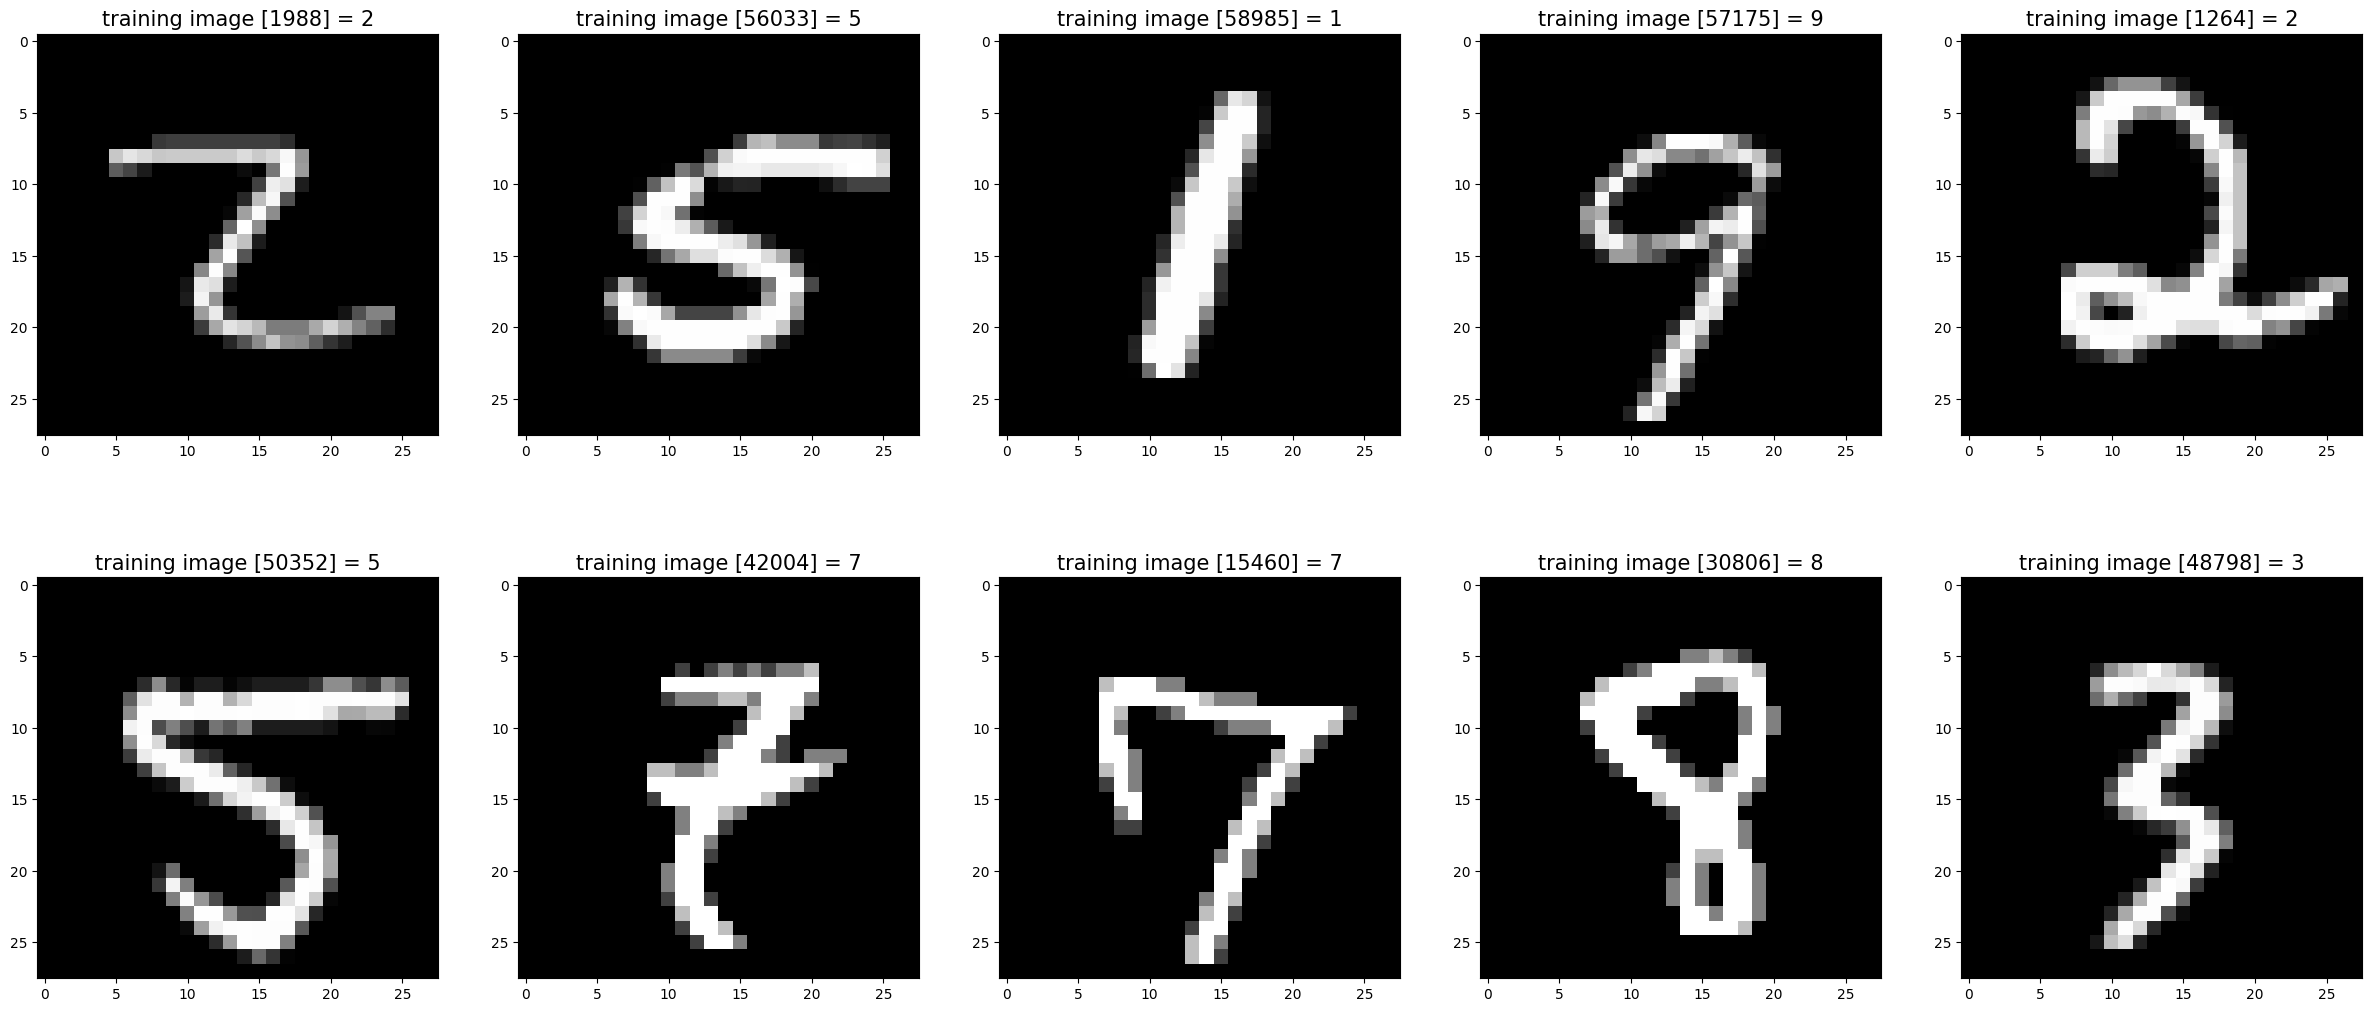

In [5]:
import random

def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1

    plt.figure(figsize=(30,20))
    index = 1
    for x in zip(images, title_texts):
        image = x[0]
        title_text = x[1]
        plt.subplot(rows, cols, index)
        plt.imshow(image, cmap=plt.cm.gray)
        if(title_text != ''):
            plt.title(title_text, fontsize=15)
        index += 1

images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
  
    images_2_show.append(x_train[r])

    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    


show_images(images_2_show, titles_2_show)

In [6]:
print(f"Kích thước tập Train: {x_train.shape}")
print(f"Kích thước tập Label: {y_train.shape}")
print(f"Kiểu dữ liệu (Dtype): {x_train.dtype}")


Kích thước tập Train: (60000, 28, 28)
Kích thước tập Label: (60000,)
Kiểu dữ liệu (Dtype): uint8


Giá trị Pixel Tối thiểu: 0
Giá trị Pixel Tối đa: 255
Giá trị Pixel Trung bình: 33.32


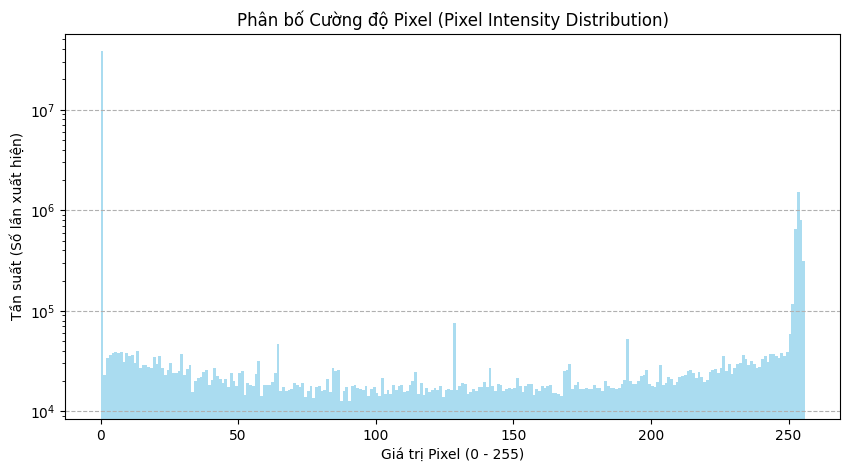

In [7]:
min_pixel = np.min(x_train)
max_pixel = np.max(x_train)
mean_pixel = np.mean(x_train)

print(f"Giá trị Pixel Tối thiểu: {min_pixel}") # Mong đợi: 0
print(f"Giá trị Pixel Tối đa: {max_pixel}")   # Mong đợi: 255
print(f"Giá trị Pixel Trung bình: {mean_pixel:.2f}") # Thường khoảng 30-35

all_pixels = x_train.flatten()

plt.figure(figsize=(10, 5))
plt.hist(all_pixels, bins=256, range=(0, 256), color='skyblue', alpha=0.7)

plt.title('Phân bố Cường độ Pixel (Pixel Intensity Distribution)')
plt.xlabel('Giá trị Pixel (0 - 255)')
plt.ylabel('Tần suất (Số lần xuất hiện)')
plt.yscale('log')
plt.grid(axis='y', linestyle='--')
plt.show()


[5 0 4 ... 5 6 8]


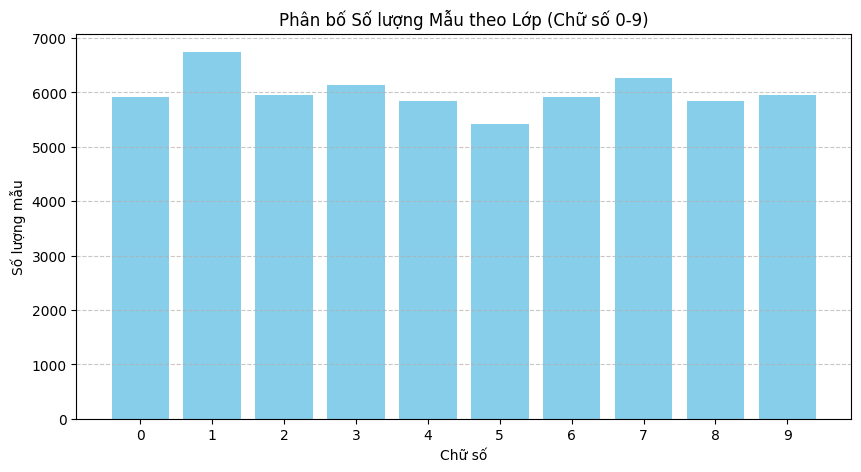

In [8]:

print(y_train)
unique_digits, counts = np.unique(y_train, return_counts=True)

plt.figure(figsize=(10, 5))
plt.bar(unique_digits, counts, color='skyblue')
plt.xticks(unique_digits)
plt.title('Phân bố Số lượng Mẫu theo Lớp (Chữ số 0-9)')
plt.xlabel('Chữ số')
plt.ylabel('Số lượng mẫu')
plt.grid(axis='y', linestyle='--', alpha=0.7) # Thêm lưới cho dễ đọc

plt.show()

In [9]:
# Loại bỏ các Pixels có Cường độ không đổi
x_train_flat = x_train.reshape(x_train.shape[0], -1)

variances = np.var(x_train_flat, axis=0)

constant_pixel_indices = np.where(variances == 0)[0]

x_train_reduced = np.delete(x_train_flat, constant_pixel_indices, axis=1)

print(f"constant_pixel_indice: {constant_pixel_indices}")
print(f"Số lượng features giảm từ 784 xuống còn {x_train_reduced.shape[1]}")

constant_pixel_indice: [  0   1   2   3   4   5   6   7   8   9  10  11  16  17  18  19  20  21
  22  23  24  25  26  27  28  29  30  31  52  53  54  55  56  57  82  83
  84  85 111 112 140 141 168 476 560 644 645 671 672 673 699 700 701 727
 728 729 730 754 755 756 757 758 759 780 781 782 783]
Số lượng features giảm từ 784 xuống còn 717


In [10]:
# Pictures intensity rescaling
x_train_normalized = x_train_reduced.astype('float32') / 255.0


In [11]:
import numpy as np

print("--- TRƯỚC KHI CHUẨN HÓA ---")
print(f"Min: {np.min(x_train)}")
print(f"Max: {np.max(x_train)}")
print(f"Kiểu dữ liệu: {x_train.dtype}")
print("-" * 30)

print("--- SAU KHI CHUẨN HÓA ---")
print(f"Min: {np.min(x_train_normalized)}")
print(f"Max: {np.max(x_train_normalized)}")
print(f"Kiểu dữ liệu: {x_train_normalized.dtype}")

--- TRƯỚC KHI CHUẨN HÓA ---
Min: 0
Max: 255
Kiểu dữ liệu: uint8
------------------------------
--- SAU KHI CHUẨN HÓA ---
Min: 0.0
Max: 1.0
Kiểu dữ liệu: float32


In [12]:
# One-hot encoding
num_classes = 10 
y_train_encoded = np.eye(num_classes)[y_train]
y_test_encoded = np.eye(num_classes)[y_test]

In [13]:
# Xử lý tập test
x_test_flat = x_test.reshape(x_test.shape[0], -1)

variances_test = np.var(x_test_flat, axis=0)

x_test_reduced = np.delete(x_test_flat, constant_pixel_indices, axis=1)

x_test_normalized = x_test_reduced.astype('float32') / 255.0

In [14]:
# Thêm bias - dữ liệu đầu ra cuối
x_train_bias = np.hstack((np.ones((x_train_normalized.shape[0], 1)), x_train_normalized))
x_test_bias = np.hstack((np.ones((x_test_normalized.shape[0], 1)), x_test_normalized))

In [15]:
print(x_train_bias.shape)
print(y_train_encoded.shape)
print(x_test_bias.shape)
print(y_test_encoded.shape)

(60000, 718)
(60000, 10)
(10000, 718)
(10000, 10)


In [16]:
from sklearn.linear_model import LogisticRegression
import numpy as np

y_train_labels = np.argmax(y_train_encoded, axis=1)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', fit_intercept=False, max_iter=1000)

model.fit(x_train_bias, y_train_labels)

c:\Users\hongk\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,False
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'multinomial'


In [17]:
y_test_labels = np.argmax(y_test_encoded, axis=1)
accuracy = model.score(x_test_bias, y_test_labels)
print(f"--- KẾT QUẢ TỪ SCIKIT-LEARN (Dùng để đối chiếu) ---")
print(f"Độ chính xác (Accuracy): {accuracy * 100:.2f}%")

--- KẾT QUẢ TỪ SCIKIT-LEARN (Dùng để đối chiếu) ---
Độ chính xác (Accuracy): 92.59%


In [5]:
class MyPCA:
    def __init__(self, n_components):
        self.n_components = n_components   
        self.components = None
        self.mean = None
        self.scale = None
        
    def fit(self, X):
        # Standardize data 
        X = X.copy()
        self.mean = np.mean(X, axis = 0)
        self.scale = np.std(X, axis = 0)
        
        # --- FIX LỖI NaN/Inf ---
        # Nếu độ lệch chuẩn bằng 0 (pixel không đổi), gán bằng 1 để tránh chia cho 0
        self.scale[self.scale == 0] = 1.0
        # -----------------------
        
        X_std = (X - self.mean) / self.scale
        
        # Eigendecomposition of covariance matrix       
        # Dùng rowvar=False vì mỗi cột là 1 feature
        cov_mat = np.cov(X_std, rowvar=False)
        
        # Dùng eigh cho ma trận đối xứng (nhanh và ổn định hơn eig)
        eig_vals, eig_vecs = np.linalg.eigh(cov_mat) 
        
        # Sắp xếp giảm dần (eigh trả về tăng dần nên cần đảo ngược)
        sorted_indices = np.argsort(eig_vals)[::-1]
        eig_vals_sorted = eig_vals[sorted_indices]
        eig_vecs_sorted = eig_vecs[:, sorted_indices]
        
        # Chỉnh dấu (Sign flip) để nhất quán
        max_abs_idx = np.argmax(np.abs(eig_vecs_sorted), axis=0)
        signs = np.sign(eig_vecs_sorted[max_abs_idx, range(eig_vecs_sorted.shape[1])])
        eig_vecs_sorted = eig_vecs_sorted * signs[np.newaxis, :]
        
        # Lưu các thành phần chính (Transpose để tiện dot product sau này: (n_components, n_features))
        self.components = eig_vecs_sorted[:, :self.n_components].T
        
        # Explained variance ratio
        total_variance = np.sum(eig_vals_sorted)
        self.explained_variance_ratio = eig_vals_sorted[:self.n_components] / total_variance
        self.cum_explained_variance = np.cumsum(self.explained_variance_ratio)

        return self

    def transform(self, X):
        X = X.copy()
        # Dùng scale đã xử lý số 0 từ bước fit
        X_std = (X - self.mean) / self.scale
        # Chiếu dữ liệu: X_std (N, 784) dot Components.T (784, k) -> (N, k)
        # Lưu ý: self.components ở trên mình đã Transpose dạng (k, 784)
        # Nên ở đây nhân với self.components.T (784, k)
        X_proj = X_std.dot(self.components.T)
        
        return X_proj

In [12]:
import numpy as np
import struct
from array import array
import os

# ==========================================
# 1. DATA LOADER CLASS (Code của bạn + Imports)
# ==========================================
class MnistDataloader(object):
    def __init__(self, training_images_filepath, training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        
        images = []
        # Lưu ý: Code gốc của bạn tạo list rồi append, sau đó reshape
        # Cách xử lý mảng này sẽ trả về shape (N, 28, 28)
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return np.array(images), np.array(labels)
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)

# ==========================================
# 2. CÁC HÀM FEATURE ENGINEERING (Đã thiết kế trước đó)
# ==========================================

# --- Design 1: Raw Pixels (Filtered) ---
# --- Design 1: Raw Pixels (CORRECTED VERSION) ---
def get_design1_raw_pixels(x_input, mask=None):
    """
    Design 1: Raw Pixels với Variance Thresholding.
    Nếu mask=None, hàm sẽ tính mask (dùng cho tập TRAIN).
    Nếu mask có giá trị, hàm sẽ áp dụng mask đó (dùng cho tập TEST).
    """
 
    
    # Bước 1: Tính mask nếu chưa có (chỉ tập TRAIN)
    if mask is None:
        feature_mask = np.var(x_input, axis=0) > 0
        n_removed = x_input.shape[1] - np.sum(feature_mask)
        print(f"-> Đã loại bỏ {n_removed} pixel tĩnh (constant pixels).")
    else:
        feature_mask = mask # Sử dụng mask đã truyền vào (tập TEST)
    
    # Bước 2: Lọc bỏ các cột chết
    x_filtered = x_input[:, feature_mask]
    
    # Bước 3: Chuẩn hóa về [0, 1]
    x_norm = x_filtered / 255.0
    
    # Bước 4: Thêm Bias (cột toàn số 1 vào đầu)
    m = x_norm.shape[0]
    x_final = np.hstack([np.ones((m, 1)), x_norm])
    
    # Bước 5: TRẢ VỀ 2 GIÁ TRỊ (vector features và mask)
    return x_final, feature_mask

# --- Design 2: Block Averaging ---
def get_design2_block_avg(x_input, block_size=2):
    # x_input: (N, 784) -> Cần reshape để xử lý
    N = x_input.shape[0]
    images = x_input.reshape(N, 28, 28)
    
    grid_h, grid_w = 28 // block_size, 28 // block_size
    reshaped = images.reshape(N, grid_h, block_size, grid_w, block_size)
    averaged = reshaped.mean(axis=(2, 4)).reshape(N, -1)
    
    x_norm = averaged / 255.0
    return np.hstack([np.ones((N, 1)), x_norm])

# --- Design 3: Projection Profiles ---
def get_design3_projection(x_input):
    # x_input: (N, 784)
    N = x_input.shape[0]
    images = x_input.reshape(N, 28, 28)
    
    h_prof = np.sum(images, axis=2)
    v_prof = np.sum(images, axis=1)
    features = np.hstack([h_prof, v_prof])
    
    max_val = np.max(features) if np.max(features) > 0 else 1
    x_norm = features / max_val
    return np.hstack([np.ones((N, 1)), x_norm])



def get_design4_pca(x_train_flat, x_test_flat, n_components=100):
    """
    Design 4: Giảm chiều bằng PCA.
    Quy trình: Fit PCA trên Train, Transform cả Train và Test, sau đó thêm Bias.
    Input: x_train_flat, x_test_flat (cả hai đều là (N, 784))
    Output: (x_train_pca_final, x_test_pca_final) - đã thêm bias
    """

    
    # 1. Fit PCA chỉ trên tập Train
    # MyPCA(n_components=100) sẽ chọn 100 thành phần mạnh nhất
    pca = MyPCA(n_components=n_components).fit(x_train_flat)
    
    # 2. Transform (chiếu dữ liệu)
    # Áp dụng Mean/Scale/Components đã học từ tập train cho cả 2 tập
    x_train_pca = pca.transform(x_train_flat)
    x_test_pca = pca.transform(x_test_flat)
    
    # 3. Báo cáo tỷ lệ phương sai giữ lại (Đưa vào Báo cáo)
    variance_retained = np.sum(pca.explained_variance_ratio) * 100
    # print(f"-> PCA (k={n_components}) giữ lại {variance_retained:.2f}% phương sai.")
    
    # 4. Thêm Bias (cột toàn số 1)
    m_train = x_train_pca.shape[0]
    m_test = x_test_pca.shape[0]
    
    x_train_final = np.hstack([np.ones((m_train, 1)), x_train_pca])
    x_test_final = np.hstack([np.ones((m_test, 1)), x_test_pca])
    
    return x_train_final, x_test_final
 
# --- Helper: One-Hot Encoding ---
def one_hot_encode(y, num_classes=10):
    return np.eye(num_classes)[y]

# ==========================================
# 3. LUỒNG THỰC THI CHÍNH (MAIN PIPELINE)
# ==========================================

# A. Định nghĩa đường dẫn file (Thay đổi đường dẫn thực tế của bạn ở đây)
input_path = './data' # Ví dụ thư mục chứa file
training_images_filepath = os.path.join(input_path, 'train-images.idx3-ubyte')
training_labels_filepath = os.path.join(input_path, 'train-labels.idx1-ubyte')
test_images_filepath = os.path.join(input_path, 't10k-images.idx3-ubyte')
test_labels_filepath = os.path.join(input_path, 't10k-labels.idx1-ubyte')

# B. Load dữ liệu thô
print("1. Loading Data...")
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = mnist_dataloader.load_data()

# C. Tiền xử lý chung (Global Preprocessing)
print(f"   Original Shape: {x_train_raw.shape}") # Thường là (60000, 28, 28)

# Bắt buộc: Flatten về (N, 784) để thống nhất đầu vào cho các hàm Feature Design
x_train_flat = x_train_raw.reshape(x_train_raw.shape[0], -1)
x_test_flat = x_test_raw.reshape(x_test_raw.shape[0], -1)

# Bắt buộc: One-Hot Encode cho nhãn y
y_train_encoded = one_hot_encode(y_train_raw)
y_test_encoded = one_hot_encode(y_test_raw)

print(f"   Flattened Shape: {x_train_flat.shape}")
print(f"   Y Encoded Shape: {y_train_encoded.shape}")

# D. Tạo 3 bộ dữ liệu Feature Design
print("\n2. Generating Feature Vectors...")

# --- Design 1 ---
# Lưu ý: Tính mask trên Train, áp dụng mask đó cho Test
x_train_d1, mask_d1 = get_design1_raw_pixels(x_train_flat)
x_test_d1, _ = get_design1_raw_pixels(x_test_flat, mask=mask_d1)
print(f"   Design 1 (Raw Pixels) Shape: {x_train_d1.shape}")

# --- Design 2 ---
x_train_d2 = get_design2_block_avg(x_train_flat)
x_test_d2 = get_design2_block_avg(x_test_flat)
print(f"   Design 2 (Block Avg 2) Shape:  {x_train_d2.shape}")

# --- Design 3 ---
x_train_d3 = get_design2_block_avg(x_train_flat, block_size=4)
x_test_d3 = get_design2_block_avg(x_test_flat, block_size=4)
print(f"   Design 3 (Block Avg 4) Shape:  {x_train_d3.shape}")

# --- Design 4 ---
x_train_d4 = get_design3_projection(x_train_flat)
x_test_d4 = get_design3_projection(x_test_flat)
print(f"   Design 4 (Projections) Shape: {x_train_d4.shape}")

# --- Design 5 ---
x_train_d5, x_test_d5 = get_design4_pca(x_train_flat, x_test_flat, n_components=331) 
print(f"   Design 5 (PCA) Shape:      {x_train_d5.shape}")





print("\n-> Sẵn sàng để đưa vào huấn luyện!")

1. Loading Data...
   Original Shape: (60000, 28, 28)
   Flattened Shape: (60000, 784)
   Y Encoded Shape: (60000, 10)

2. Generating Feature Vectors...
-> Đã loại bỏ 67 pixel tĩnh (constant pixels).
   Design 1 (Raw Pixels) Shape: (60000, 718)
   Design 2 (Block Avg 2) Shape:  (60000, 197)
   Design 3 (Block Avg 4) Shape:  (60000, 50)
   Design 4 (Projections) Shape: (60000, 57)
   Design 5 (PCA) Shape:      (60000, 332)

-> Sẵn sàng để đưa vào huấn luyện!


In [ ]:

# ======================================================
# TEST THỬ BẰNG THƯ VIỆN SKLEARN - KHÔNG DÙNG CHÍNH THỨC
# ======================================================
params = {
    'lr': 0.2,       
    'epochs': 1000    
}

results = {}

# Danh sách các bộ dữ liệu đã chuẩn bị
datasets = [
    ("Design 1: Raw Pixels", x_train_d1, x_test_d1),
    ("Design 2: Block Avg-2",  x_train_d2, x_test_d2),
    ("Design 3: Block Avg-4",  x_train_d3, x_test_d3),
    ("Design 4: Projections", x_train_d4, x_test_d4),
    ("Desing 5: PCA", x_train_d5, x_test_d5)
]


y_test_labels = np.argmax(y_test_encoded, axis=1)


BENCHMARKING: SKLEARN LOGISTIC REGRESSION (SOFTMAX)
Training: Design 1: Raw Pixels...


c:\Users\hongk\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


   -> Accuracy: 92.62%
Training: Design 2: Block Avg (2x2)...


c:\Users\hongk\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


   -> Accuracy: 92.43%
Training: Design 3: Block Avg (4x4)...


c:\Users\hongk\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


   -> Accuracy: 89.52%
Training: Design 4: Projections...


c:\Users\hongk\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


   -> Accuracy: 81.32%
Training: Design 5: PCA...


c:\Users\hongk\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


   -> Accuracy: 92.62%


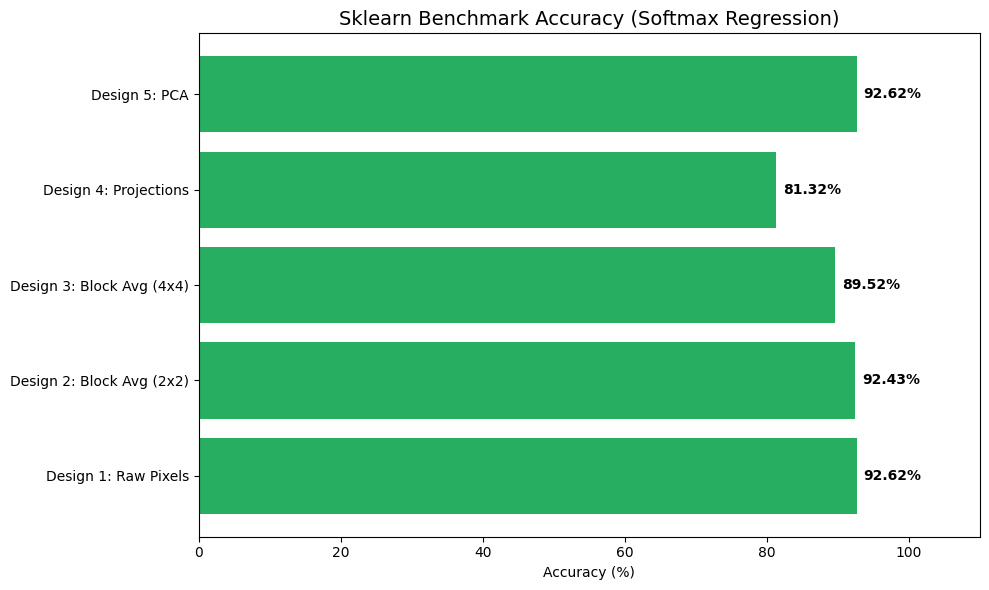

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# ======================================================
# CHẠY BENCHMARK VỚI SCIKIT-LEARN
# ======================================================
sklearn_results = {}

print(f"{'='*60}")
print("BENCHMARKING: SKLEARN LOGISTIC REGRESSION (SOFTMAX)")
print(f"{'='*60}")

# Cấu hình model để nó hoạt động như Softmax Regression thuần túy
# solver='lbfgs': Thuật toán tối ưu hóa cực mạnh (nhanh hơn Gradient Descent thường)
clf = LogisticRegression(
    multi_class='multinomial', # Kích hoạt chế độ Softmax
    solver='lbfgs',
    max_iter=5000,             # Tăng số vòng lặp để đảm bảo hội tụ
    fit_intercept=False,       # False vì dữ liệu của bạn ĐÃ CÓ cột Bias (cột 1)
    random_state=42
)

for name, X_tr, X_te in datasets:
    print(f"Training: {name}...")
    
    try:
        # 1. Huấn luyện
        # Lưu ý: y_train_labels phải là dạng số nguyên (0, 1, 2...), không phải One-Hot
        clf.fit(X_tr, y_train_labels)
        
        # 2. Dự đoán
        y_pred = clf.predict(X_te)
        
        # 3. Đánh giá
        acc = accuracy_score(y_test_labels, y_pred)
        sklearn_results[name] = acc * 100
        
        print(f"   -> Accuracy: {acc * 100:.2f}%")
        
    except Exception as e:
        print(f"   -> Lỗi: {e}")
        sklearn_results[name] = 0

# ======================================================
# VẼ BIỂU ĐỒ SO SÁNH
# ======================================================
plt.figure(figsize=(10, 6))
names = list(sklearn_results.keys())
values = list(sklearn_results.values())

bars = plt.barh(names, values, color='#27ae60')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, 
             f'{width:.2f}%', 
             ha='left', va='center', fontweight='bold', color='black')

plt.xlim(0, 110)
plt.title('Sklearn Benchmark Accuracy (Softmax Regression)', fontsize=14)
plt.xlabel('Accuracy (%)')
plt.tight_layout()
plt.show()